# TP 2: La vida en colores


### Objetivos:
-------------------------------
+ Armar mascaras azules y rojas. 
+ Comparación de segmentación de la imagen entre RGB y HSV.

In [1]:
#importamos los paquetes

%matplotlib inline

#Si se quiere ver en más detalle las imagenes quitar el inline

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

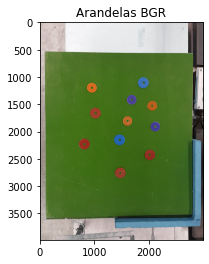

In [2]:
#cargamos la imagen
img=cv.imread("arandelas.jpg")


plt.figure(1)
plt.title("Arandelas BGR")
plt.imshow(img)
plt.show()

 No debemos olvidar que cv muestra la imagen en BGR por lo tanto debemos cambiarla a RGB

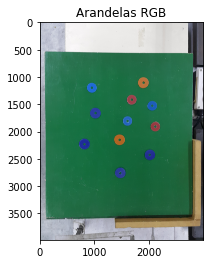

In [3]:
#Definimos la imagen de las arandelas en RGB
imgRGB=cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.figure(2)
plt.title("Arandelas RGB")
plt.imshow(imgRGB)
plt.show()

## Definimos las funciones para operar

+  La función modelo_estadistico obtiene y devuelve el valor promedio de los tres canales y el desvío estandard

In [4]:
def modelo_estadistico(img_muestra):
    color_mean, color_std=cv.meanStdDev(img_muestra)
    return color_mean, color_std

+ La función matriz_2_list convierte una matriz de valores en una lista.

In [5]:
def matriz_2_list(matriz):    
    lista=matriz.flatten().tolist()
    return lista

+ La función img_segmentada recibe una imagen, el valor promedio, su desvío correspondiente y un número (n) que ajusta el desvío; y devuelve la imagen segmentada segun los valores recibidos. 

In [6]:
def img_segmentada(img,valor_prom,desvio,n):
    mask=cv.inRange(img,valor_prom-desvio*n, valor_prom+desvio*n )

    img_segmentada=cv.bitwise_and(img, img, mask=mask)
    return img_segmentada

## Segmentación con RGB

+ Realizamos las máscaras según el color que se deseé obtener y para ello vamos a definir en cada caso un espectro de muestra del color a segmentar.

+  ### Máscara color azul

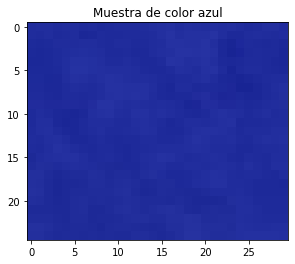

In [7]:
#Tomamos una muestra del color azul
img_muestra_azul=imgRGB[2230:2255,740:770,:]
plt.figure(3)
plt.title("Muestra de color azul")
plt.imshow(img_muestra_azul)
plt.show()

In [8]:
intensidad, desvio= modelo_estadistico(img_muestra_azul)
intensidad_lista = matriz_2_list(intensidad)
desvio_lista = matriz_2_list(desvio)

print("Valores de Intensidad")
print("Rojo: "+str(intensidad_lista[0]), "Verde: "+str(intensidad_lista[1]), "Azul: "+str(intensidad_lista[2]))
print("\nValores de disperción")
print("Rojo: "+str(desvio_lista[0]), "Verde: "+str(desvio_lista[1]), "Azul: "+str(desvio_lista[2]))

Valores de Intensidad
Rojo: 31.836 Verde: 43.82 Azul: 155.376

Valores de disperción
Rojo: 2.60840385421176 Verde: 2.6297528400972996 Azul: 2.750507347138984


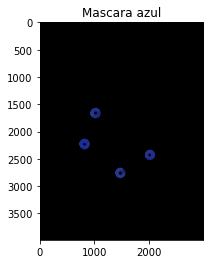

In [9]:
Mascara_azul=img_segmentada(imgRGB,intensidad,desvio,12)
plt.figure(4)
plt.title("Mascara azul")
plt.imshow(Mascara_azul)

plt.show()

+ Guardamos la imagen obtenida luego del proceso, pero recordemos que opencv trabaja en BGR por lo tanto debemos invertir los canales a RGB 

In [10]:
cv.imwrite("mascara_azul.jpeg",Mascara_azul[...,::-1])

True

+ ### Máscara color celeste

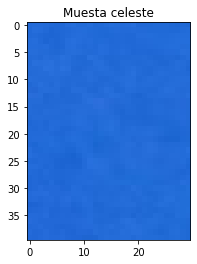

In [11]:
img_muestra_celeste=imgRGB[1170:1210, 880:910,:]
plt.figure(5)
plt.title("Muesta celeste")
plt.imshow(img_muestra_celeste)
plt.show()

In [12]:
intensidad, desvio= modelo_estadistico(img_muestra_celeste)
intensidad_lista = matriz_2_list(intensidad)
desvio_lista = matriz_2_list(desvio)

print("Valores de Intensidad")
print("Rojo: "+str(intensidad_lista[0]), "Verde: "+str(intensidad_lista[1]), "Azul: "+str(intensidad_lista[2]))
print("\nValores de disperción")
print("Rojo: "+str(desvio_lista[0]), "Verde: "+str(desvio_lista[1]), "Azul: "+str(desvio_lista[2]))

Valores de Intensidad
Rojo: 34.26833333333334 Verde: 106.40416666666667 Azul: 214.99916666666667

Valores de disperción
Rojo: 2.552057448848259 Verde: 2.3946083825033995 Azul: 2.2980062312559766


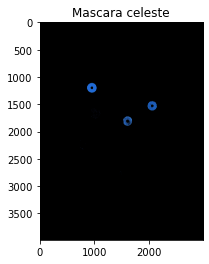

In [13]:
Mascara_celeste=img_segmentada(imgRGB,intensidad,desvio,14)
plt.figure(6)
plt.title("Mascara celeste")
plt.imshow(Mascara_celeste)
plt.show()

In [14]:
cv.imwrite("mascara_celeste.jpeg",Mascara_celeste[...,::-1])

True

+ ### Máscara Roja

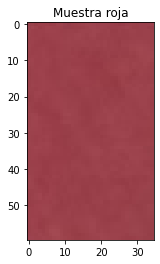

In [15]:
img_muestra_roja=imgRGB[1390:1450,1600:1635,:]
plt.figure(7)
plt.title("Muestra roja")
plt.imshow(img_muestra_roja)
plt.show()

In [16]:
intensidad, desvio= modelo_estadistico(img_muestra_roja)
intensidad_lista = matriz_2_list(intensidad)
desvio_lista = matriz_2_list(desvio)

print("Valores de Intensidad")
print("Rojo: "+str(intensidad_lista[0]), "Verde: "+str(intensidad_lista[1]), "Azul: "+str(intensidad_lista[2]))
print("\nValores de disperción")
print("Rojo: "+str(desvio_lista[0]), "Verde: "+str(desvio_lista[1]), "Azul: "+str(desvio_lista[2]))

Valores de Intensidad
Rojo: 154.7052380952381 Verde: 64.37190476190476 Azul: 74.49666666666667

Valores de disperción
Rojo: 2.0926791191423533 Verde: 2.165810348834798 Azul: 2.0643200963796304


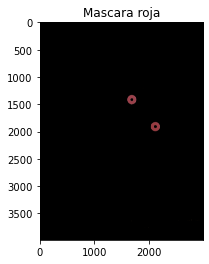

In [17]:
Mascara_roja=img_segmentada(imgRGB,intensidad,desvio,14)
plt.figure(8)
plt.title("Mascara roja")
plt.imshow(Mascara_roja)
plt.show()

In [18]:
cv.imwrite("Mascara_Roja.jpg",Mascara_roja[...,::-1])

True

+ ### Máscara Naranja

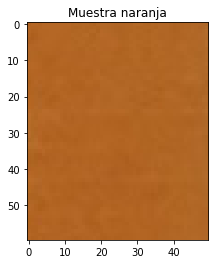

In [19]:
img_muestra_naranja=imgRGB[2120:2180, 1480:1530,:]
plt.figure(9)
plt.title("Muestra naranja")
plt.imshow(img_muestra_naranja)
plt.show()

In [20]:
intensidad, desvio= modelo_estadistico(img_muestra_naranja)
intensidad_lista = matriz_2_list(intensidad)
desvio_lista = matriz_2_list(desvio)

print("Valores de Intensidad")
print("Rojo: "+str(intensidad_lista[0]), "Verde: "+str(intensidad_lista[1]), "Azul: "+str(intensidad_lista[2]))
print("\nValores de disperción")
print("Rojo: "+str(desvio_lista[0]), "Verde: "+str(desvio_lista[1]), "Azul: "+str(desvio_lista[2]))

Valores de Intensidad
Rojo: 177.38966666666667 Verde: 101.1 Azul: 35.785

Valores de disperción
Rojo: 2.0861031986826535 Verde: 2.3402279091292306 Azul: 2.5333985737213798


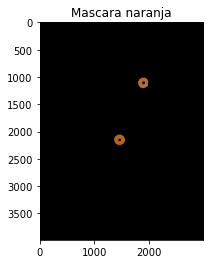

In [21]:
Mascara_naranja=img_segmentada(imgRGB,intensidad,desvio,14)
plt.figure(10)
plt.title("Mascara naranja")

plt.imshow(Mascara_naranja)
plt.show()

In [22]:
mascara_naranja_copia=cv.imwrite("Mascara_naranja.png",Mascara_naranja[...,::-1])

## Segmentación con HSV
+ Realizamos el mismo procedimiento que con RGB pero usando los canales HSV
+ En este caso el canal que utilizaremos para distinguir los colores es el H
+ Tomamos como límites los valores de 100 (negro) y 255 (blanco)


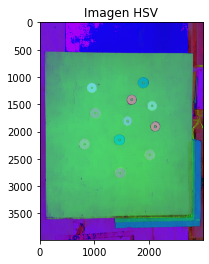

In [23]:
#Definimos imagen en HSV
imgHSV=cv.cvtColor(img,cv.COLOR_BGR2HSV)
plt.figure(11)
plt.title("Imagen HSV")
plt.imshow(imgHSV)
plt.show()

+ ## Mascara Roja

    Observamos en la imagen los valores mínimo y máximo de las arandelas rojas, a partir de ellos definimos color_l y color_u 


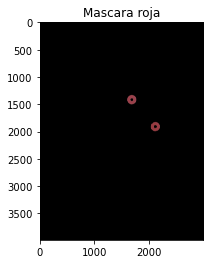

In [24]:
color_l=(175,100,100)
color_u=(179,255,255)

mask=cv.inRange(imgHSV,color_l, color_u )

img_segmentada=cv.bitwise_and(imgRGB, imgRGB, mask=mask)
plt.figure(12)
plt.title("Mascara roja")
plt.imshow(img_segmentada)
plt.show()

+ ## Mascara naranja

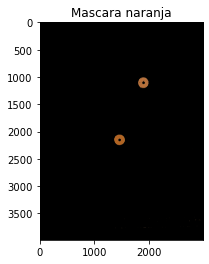

In [25]:
color_l=(13,100,100)
color_u=(15,255,255)

mask=cv.inRange(imgHSV,color_l, color_u )

img_segmentada=cv.bitwise_and(imgRGB, imgRGB, mask=mask)
plt.figure(13)
plt.title("Mascara naranja")
plt.imshow(img_segmentada)
plt.show()

+ ## Mascara azul

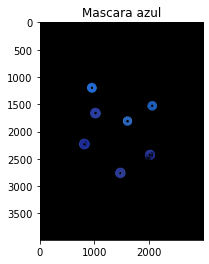

In [26]:
color_l=(103,100,100)
color_u=(117,255,255)

mask=cv.inRange(imgHSV,color_l, color_u )

img_segmentada=cv.bitwise_and(imgRGB, imgRGB, mask=mask)
plt.figure(14)
plt.title("Mascara azul")
plt.imshow(img_segmentada)
plt.show()

+ ## Mascara celeste

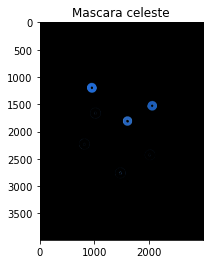

In [27]:
color_l=(102,100,100)
color_u=(109,255,255)

mask=cv.inRange(imgHSV,color_l, color_u )

img_segmentada=cv.bitwise_and(imgRGB, imgRGB, mask=mask)
plt.figure(15)
plt.title("Mascara celeste")
plt.imshow(img_segmentada)
plt.show()

## Analisis de Resultados y conclusiones

Si bien con ambos métodos obtenemos la segmentación entre rojo y azul, con RGB pudimos distinguir máscaras de los cuatro matices colores (rojo, naranja, azul y celeteste), sin embargo con HSV para los matices azules y celestes tuvimos inconvenientes puesto que en la figura 14 se observan ambas colores de arandelas, y en la figura 15 se observan los contornos de las arandelas azules.

Por ende para una tarea más específica de segementación de los 4 matices el método más efectivo es con RGB.